In [ ]:
#Skin Cancer 

In [15]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [16]:
# Defining the path for train and test images

data_dir_train = pathlib.Path(r'C:\Users\ASUS\Desktop\Skin cancer\Train')
#print(data_dir_train)
data_dir_test = pathlib.Path(r'C:\Users\ASUS\Desktop\Skin cancer\Test')

In [17]:
# Count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
# As per instruction, 80% is used for training and 20% for validation

# train set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [20]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


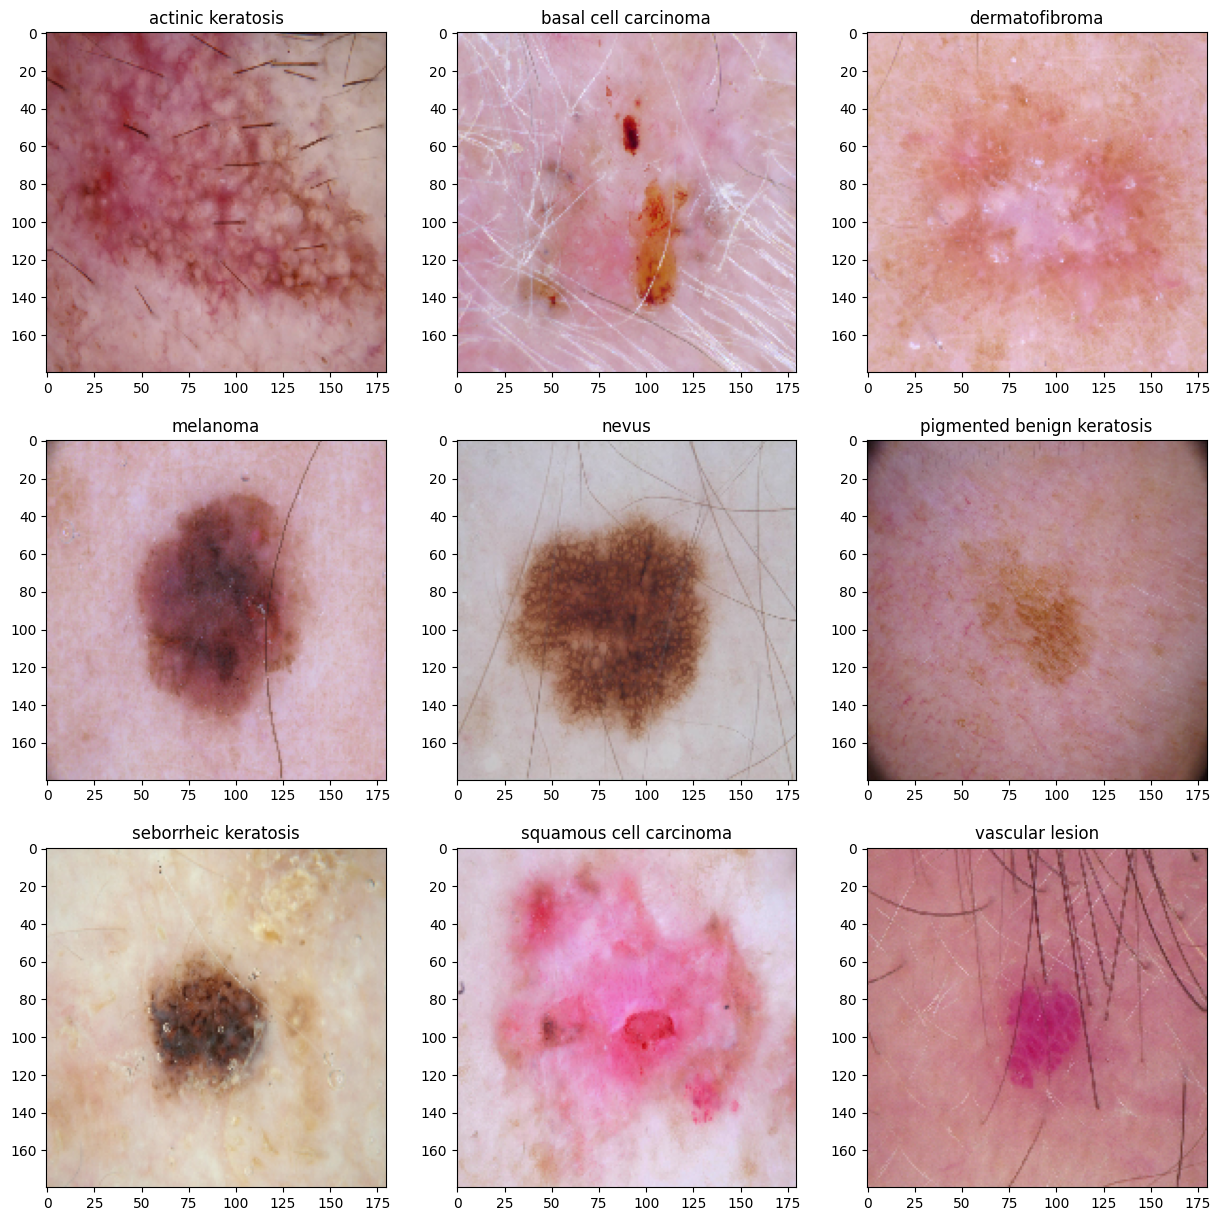

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#MODEL 1

In [24]:
input_shape = (img_height,img_width,3)

model = Sequential()    #Sequential allows you to create models layer-by-layer  

#First Convulation Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

In [25]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [26]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

In [27]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 25s 398ms/step - loss: 2.0134 - accuracy: 0.2835 - val_loss: 1.6911 - val_accuracy: 0.3669
Epoch 2/30
56/56 [==============================] - 22s 390ms/step - loss: 1.6392 - accuracy: 0.4180 - val_loss: 1.4959 - val_accuracy: 0.5056
Epoch 3/30
56/56 [==============================] - 22s 386ms/step - loss: 1.5222 - accuracy: 0.4542 - val_loss: 1.4607 - val_accuracy: 0.4899
Epoch 4/30
56/56 [==============================] - 22s 387ms/step - loss: 1.3582 - accuracy: 0.5268 - val_loss: 1.4294 - val_accuracy: 0.5101
Epoch 5/30
56/56 [==============================] - 22s 392ms/step - loss: 1.3083 - accuracy: 0.5324 - val_loss: 1.4662 - val_accuracy: 0.4676
Epoch 6/30
56/56 [==============================] - 23s 409ms/step - loss: 1.2106 - accuracy: 0.5742 - val_loss: 1.4642 - val_accuracy: 0.5257
Epoch 7/30
56/56 [==============================] - 23s 411ms/step - loss: 1.1504 - accuracy: 0.5910 - val_loss: 1.7681 - val_accuracy: 0.4586

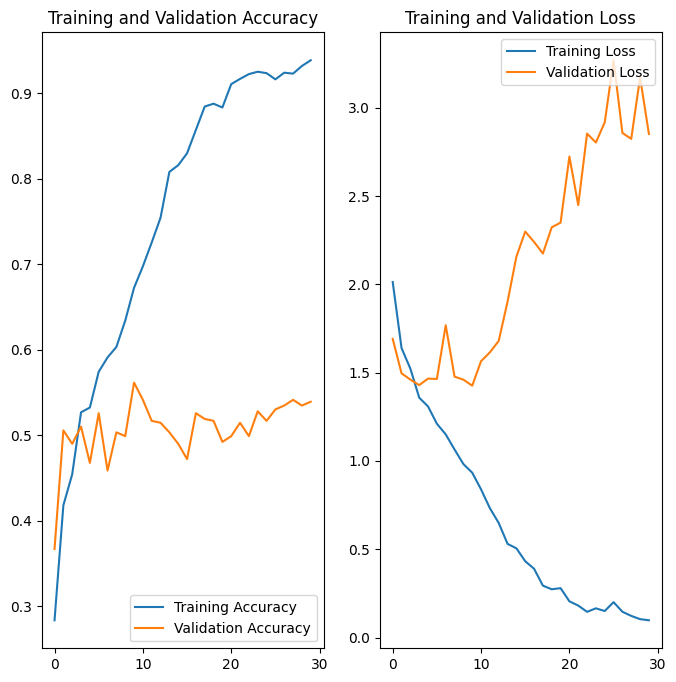

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
# Model fitting.

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 70ms/step - loss: 2.8514 - accuracy: 0.5391
Accuracy:  0.9486607313156128
Validation Accuracy:  0.5391498804092407
Loss:  0.08651036769151688
Validation Loss 2.8514246940612793


In [30]:
# Data augumentation strategy. 
# Let's rescale the image.

rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range  
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly flip each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
  #Randomly rotate each image.
  layers.experimental.preprocessing.RandomRotation(0.2),
    
  #Randomly zoom each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),
    
  #Randomly translate each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

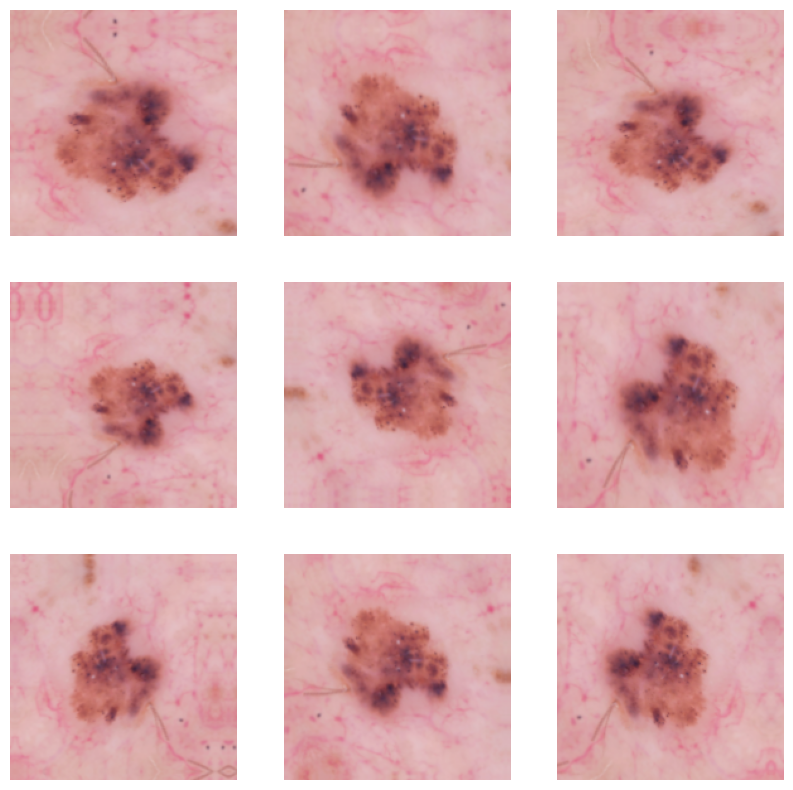

In [31]:
# Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
#model 2

In [32]:
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer  

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [33]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [34]:
epochs =30
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/30
56/56 [==============================] - 30s 497ms/step - loss: 2.3302 - accuracy: 0.1858 - val_loss: 2.0370 - val_accuracy: 0.1924
Epoch 2/30
56/56 [==============================] - 26s 468ms/step - loss: 1.9467 - accuracy: 0.2812 - val_loss: 1.7847 - val_accuracy: 0.3982
Epoch 3/30
56/56 [==============================] - 26s 468ms/step - loss: 1.7950 - accuracy: 0.3488 - val_loss: 1.7724 - val_accuracy: 0.3154
Epoch 4/30
56/56 [==============================] - 26s 469ms/step - loss: 1.7058 - accuracy: 0.3739 - val_loss: 1.6108 - val_accuracy: 0.4362
Epoch 5/30
56/56 [==============================] - 26s 468ms/step - loss: 1.6570 - accuracy: 0.3867 - val_loss: 1.6739 - val_accuracy: 0.3803
Epoch 6/30
56/56 [==============================] - 26s 469ms/step - loss: 1.6880 - accuracy: 0.3873 - val_loss: 1.7250 - val_accuracy: 0.4251
Epoch 7/30
56/56 [==============================] - 26s 473ms/step - loss: 1.6123 - accuracy: 0.4118 - val_loss: 1.8126 - val_accuracy: 0.3691

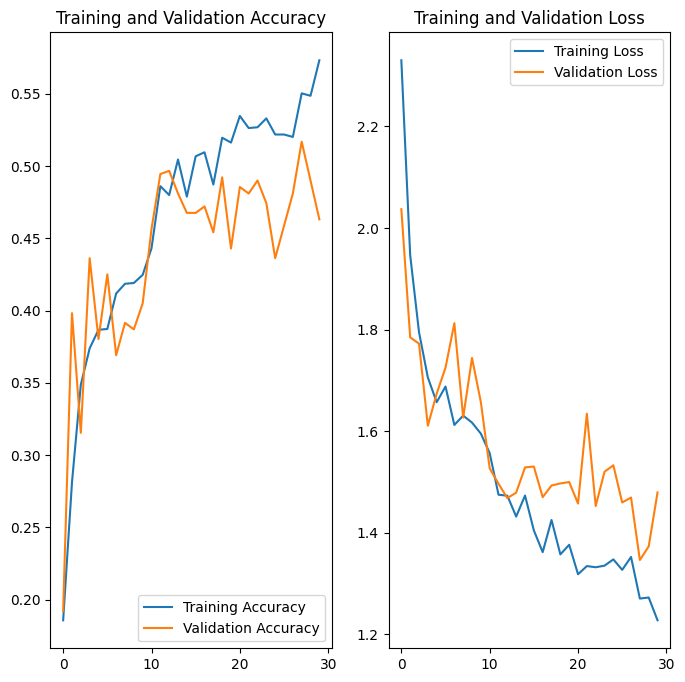

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
loss, accuracy = model2.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model2.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 1s 67ms/step - loss: 1.4795 - accuracy: 0.4631
Accuracy:  0.4966517984867096
Validation Accuracy:  0.463087260723114
Loss:  1.404819369316101
Validation Loss 1.4795289039611816


In [37]:
def count_distribution(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = count_distribution(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

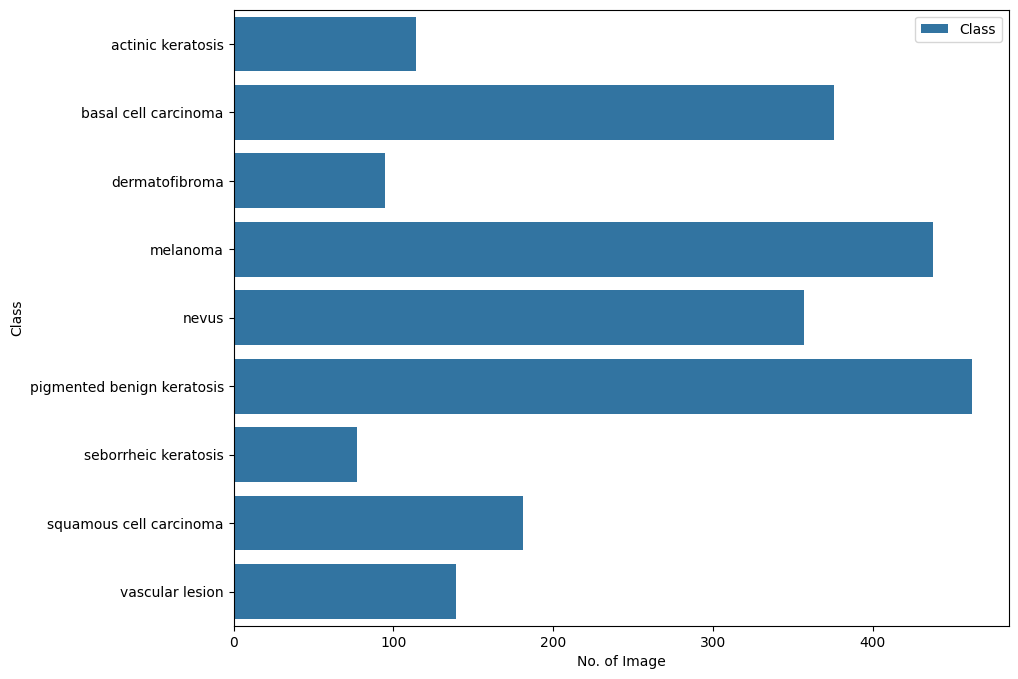

In [38]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [64]:
!pip install Augmentor

In [65]:
import os
import Augmentor

path_to_training_dataset = r"C:\Users\ASUS\Desktop\Skin cancer\Train"  # Replace with the actual path

class_names = ['actinic keratosis', 'basal cell carcinoma', 'nevus','dermatofibroma','melanoma','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']  # Replace with the actual class names

if not os.path.exists(path_to_training_dataset):
    print("The specified directory does not exist.")
else:
    # Continue with your code using the correct directory path
    for i in class_names:
        p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)



Initialised with 114 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2097914B4D0>: 100%|█| 500/500 [00:01<00:00, 282.22 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2097A6A10D0>: 100%|█| 500/500 [00:03<00:00, 148.57 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1011x713 at 0x2097A6B8890>: 100%|█| 500/500 [00:09<00:00, 54.63 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20978FC7950>: 100%|█| 500/500 [00:01<00:00, 263.73 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=965x624 at 0x209C144E210>: 100%|█| 500/500 [00:09<00:00, 50.07 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2097A6C3790>: 100%|█| 500/500 [00:01<00:00, 270.69 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x20978FEBCD0>: 100%|█| 500/500 [00:04<00


Initialised with 181 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20978F74DD0>: 100%|█| 500/500 [00:02<00:00, 246.51 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\ASUS\Desktop\Skin cancer\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20979277210>: 100%|█| 500/500 [00:02<00:00, 195.82 Samples


In [66]:
from pathlib import Path

# Specify the directory path to the training dataset
data_dir_train = Path(r"C:\Users\ASUS\Desktop\Skin cancer\Train")  # Replace with the actual path

# Count the number of image files in the training dataset
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))

print(image_count_train)


4500


In [67]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_17908dd2-a36f-4744-aa7c-eb1ae7e773e5.jpg',
 'C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_681bfa76-6a7c-4c5b-be88-66d1dada81be.jpg',
 'C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_bbf625cd-3207-4641-af7d-858b690ff3eb.jpg',
 'C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_cbe26e72-215a-4c56-b207-f0093c34c093.jpg',
 'C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_d86fb121-b9be-46c0-a7e3-88b826710e00.jpg',
 'C:\\Users\\ASUS\\Desktop\\Skin cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e23891b6-4a64-4ddc-a875-764a2a341875.jpg',
 'C:\\Users\\ASUS\\Desktop\\

In [68]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [69]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [70]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [71]:
#label count.
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

In [72]:
batch_size = 32
img_height = 180
img_width = 180

In [73]:
# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ASUS\Desktop\Skin cancer\Train",
    seed=123,
    validation_split=0.2,    # 20% fraction of data to reserve for validation.
    subset="training",
    image_size=(img_height, img_width),
    label_mode='categorical',  # label_mode='categorical' means that the labels are encoded as a categorical vector.
    batch_size=batch_size
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [74]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"C:\Users\ASUS\Desktop\Skin cancer\Train",
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size
)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [75]:
model3 = Sequential()

model3.add(layers.Rescaling(scale=1./255))
#model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization 
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

In [76]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [77]:
epochs = 50
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
169/169 [==============================] - 83s 478ms/step - loss: 2.4862 - accuracy: 0.1703 - val_loss: 3.6828 - val_accuracy: 0.0898
Epoch 2/50
169/169 [==============================] - 81s 477ms/step - loss: 2.0648 - accuracy: 0.2454 - val_loss: 2.5021 - val_accuracy: 0.2190
Epoch 3/50
169/169 [==============================] - 79s 468ms/step - loss: 1.8682 - accuracy: 0.2873 - val_loss: 2.6962 - val_accuracy: 0.2502
Epoch 4/50
169/169 [==============================] - 81s 476ms/step - loss: 1.6613 - accuracy: 0.3685 - val_loss: 2.1218 - val_accuracy: 0.3200
Epoch 5/50
169/169 [==============================] - 81s 476ms/step - loss: 1.5718 - accuracy: 0.4019 - val_loss: 1.7738 - val_accuracy: 0.3437
Epoch 6/50
169/169 [==============================] - 78s 460ms/step - loss: 1.4876 - accuracy: 0.4364 - val_loss: 1.7520 - val_accuracy: 0.3675
Epoch 7/50
169/169 [==============================] - 74s 437ms/step - loss: 1.4119 - accuracy: 0.4586 - val_loss: 1.7434 - val_ac

In [3]:
loss, accuracy = model3.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model2.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 5s 94ms/step - loss: 1.6462 - accuracy: 0.4105
Accuracy:  0.9438056349754333
Validation Accuracy:  0.81054195165634155
Loss:  0.16322782635688782
Validation Loss 0.6462371349334717


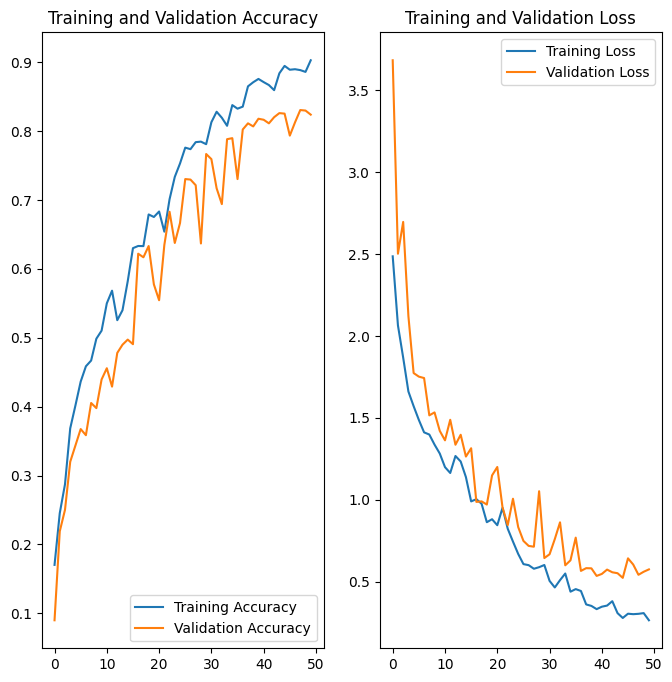

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()